In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels import regression as sm
import sklearn.linear_model as lm
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold

In [117]:
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [118]:
train_df.info()
categorical = list(train_df.select_dtypes('object').columns)
categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

There are 1460 samples in the training data set and 80 features. There are 43 columns with the 'object' data type,
meaning non-numeric categorical data. These features are contained in the "categorical" list.

I will select seven non-categorical features.

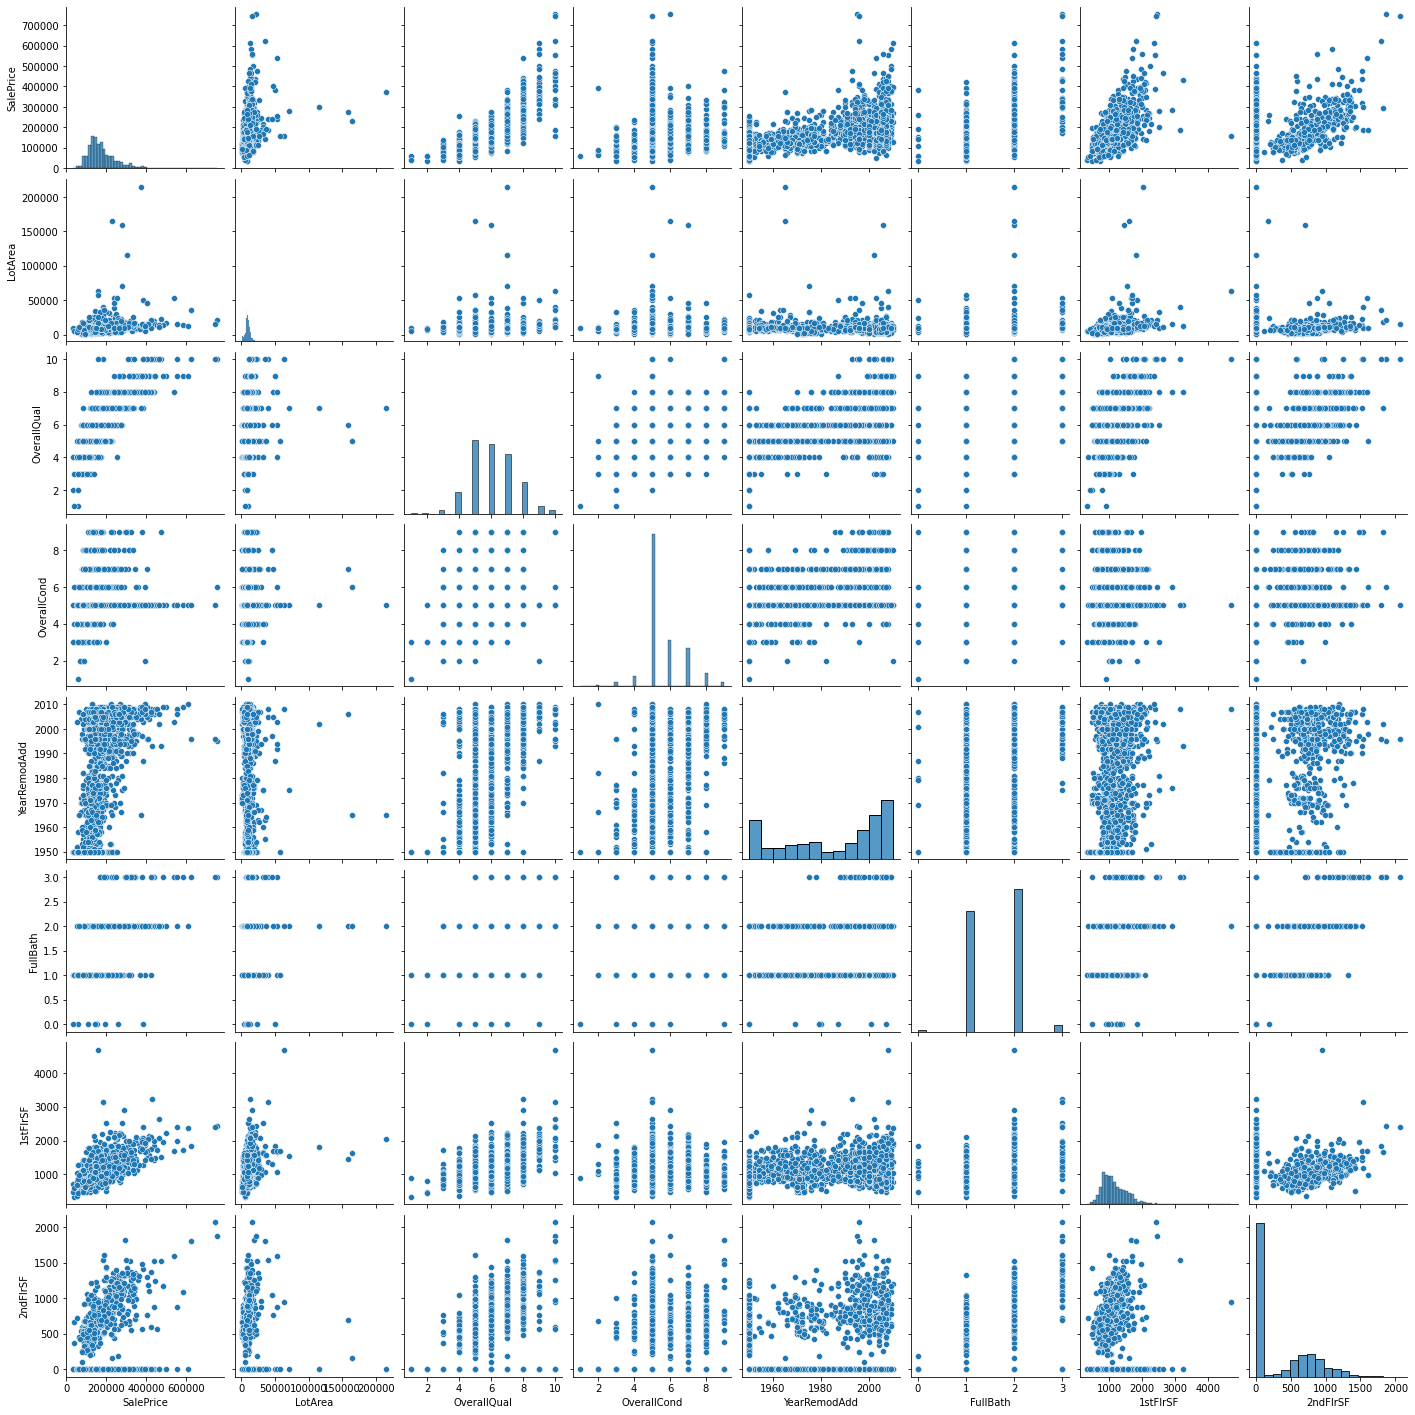

In [119]:
sns.pairplot(train_df[['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'FullBath', '1stFlrSF', '2ndFlrSF']])

The plots we care about here are in row 1 (or column 1). There appears to be a correlation between sales price and:
Overall Quality, 1st Floor Area, 2nd Floor Area, and some slight correlations with Year of Remodelling, and
Number of Full Baths.

In [120]:
#sm.linear_model.OLS()

In [121]:
df_encoded = pd.get_dummies(train_df)
df_encoded.info(verbose=True, null_counts=True)
df_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 290 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    Id                     1460 non-null   int64  
 1    MSSubClass             1460 non-null   int64  
 2    LotFrontage            1201 non-null   float64
 3    LotArea                1460 non-null   int64  
 4    OverallQual            1460 non-null   int64  
 5    OverallCond            1460 non-null   int64  
 6    YearBuilt              1460 non-null   int64  
 7    YearRemodAdd           1460 non-null   int64  
 8    MasVnrArea             1452 non-null   float64
 9    BsmtFinSF1             1460 non-null   int64  
 10   BsmtFinSF2             1460 non-null   int64  
 11   BsmtUnfSF              1460 non-null   int64  
 12   TotalBsmtSF            1460 non-null   int64  
 13   1stFlrSF               1460 non-null   int64  
 14   2ndFlrSF               1460 non-null  

C:\Users\marti\AppData\Local\Temp/ipykernel_20460/307969771.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_encoded.info(verbose=True, null_counts=True)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [122]:
df_encoded.columns[df_encoded.isna().any()].tolist()


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Setting values to the mean or zeroes could highly skew the results of a regression model.
I will use KNN to perform multivariate imputation, filling in the above columns.

In [123]:
columns = df_encoded.columns

In [124]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
imputer.fit(df_encoded)
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns = columns)


In [125]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(train_df)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [126]:
split = model_selection.train_test_split(df_encoded, train_size=0.8)
train_split = split[0]
test_split = split[1]
train_split

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1227,1228.0,20.0,72.000000,8872.0,5.0,8.0,1965.0,2008.0,300.0,595.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
887,888.0,50.0,59.000000,16466.0,5.0,7.0,1955.0,1955.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
23,24.0,120.0,44.000000,4224.0,5.0,7.0,1976.0,1976.0,0.0,840.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
466,467.0,20.0,85.000000,10628.0,7.0,5.0,1970.0,1970.0,0.0,778.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36,37.0,20.0,112.000000,10859.0,5.0,5.0,1994.0,1995.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1105.0,160.0,24.000000,2016.0,5.0,5.0,1970.0,1970.0,304.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
135,136.0,20.0,80.000000,10400.0,7.0,6.0,1970.0,1970.0,288.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
547,548.0,85.0,54.000000,7244.0,5.0,7.0,1970.0,1970.0,0.0,619.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
853,854.0,80.0,68.333333,12095.0,6.0,6.0,1964.0,1964.0,115.0,564.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
test_split

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
698,699.0,20.0,65.000000,8450.0,5.0,8.0,1965.0,2009.0,0.0,553.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1155,1156.0,20.0,90.000000,10768.0,5.0,8.0,1976.0,2004.0,0.0,1157.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
223,224.0,20.0,70.000000,10500.0,4.0,6.0,1971.0,1971.0,0.0,524.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1277,1278.0,80.0,111.666667,17871.0,6.0,5.0,1967.0,1976.0,359.0,528.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,1295.0,20.0,60.000000,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,593.0,20.0,60.000000,6600.0,5.0,8.0,1982.0,2003.0,0.0,816.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
229,230.0,120.0,43.000000,3182.0,7.0,5.0,2005.0,2006.0,16.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
168,169.0,60.0,62.000000,8244.0,7.0,5.0,2004.0,2004.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1414,1415.0,50.0,64.000000,13053.0,6.0,7.0,1923.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
lin_reg = lm.LinearRegression().fit(train_split.drop('SalePrice', axis=1), train_split['SalePrice'])
